In [5]:
import datetime
import pandas as pd

import os

In [3]:
#!pip install matplotlib
import matplotlib.pyplot as plt

start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

filelist = ["data/mix/Per Period/2018(03-08--03-11).csv",

            ]

In [6]:
for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, sep=";")
        print("sep")
    except:
        print("lineterminator")
        volume_data = pd.read_csv(file_path, lineterminator="\n")
        print("lineterminator")

    volume_data = volume_data.sort_values(by='date')

    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')


    volume_data['date'] = volume_data["date"].dt.tz_localize(None)
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)


lineterminator


C:\ProgramData\Anaconda3\envs\PredictorApp\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14,15,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


lineterminator


AttributeError: Can only use .dt accessor with datetimelike values

In [19]:
import datetime
import pytz

utc=pytz.UTC
volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S',utc=True)

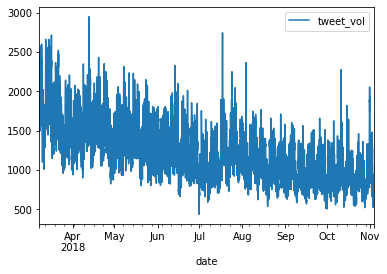

data/mix/Per Period/2018(03-08--03-11).csv
(7167483, 28)


In [21]:
volume_data = volume_data.set_index("date")

grouped_data = volume_data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')
plt.close()
grouped_data.plot(x='date')
plt.show()

print(file_path)
print(volume_data.shape)

In [2]:
file_path = "data/mix/Per Period/2018(03-08--03-11).csv"

try:
    data = pd.read_csv(file_path, sep=";")
except:
    data = pd.read_csv(file_path, lineterminator="\n")

C:\ProgramData\Anaconda3\envs\PredictorApp\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14,15,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
Frame = data.head(100000)

In [9]:
Frame.to_csv("data/mix/Per Period/2018(03-08--03-11)sample.csv")